# 🎯 مشروع التنبؤ بالدخل باستخدام بيانات التعداد السكاني (Adult Income Dataset)

**وصف المشروع:**
نهدف في هذا المشروع إلى بناء نموذج تعلم آلي (Machine Learning Model) يتنبأ ما إذا كان دخل الشخص السنوي **أعلى من 50 ألف دولار (>50K)** أو **أقل أو يساويه (<=50K)**، وذلك بالاعتماد على مجموعة من المعلومات الديموغرافية والاجتماعية مثل العمر، التعليم، نوع العمل، الحالة الاجتماعية، وغيرها.

---

## 🧩 **وصف الأعمدة في البيانات**

| العمود (Column) | الوصف بالعربي | الوصف بالإنجليزية |
|------------------|---------------|-------------------|
| **age** | عمر الفرد | Age of the individual |
| **workclass** | نوع جهة العمل (حكومي، خاص، حر...) | Type of employer (e.g., Private, Self-emp, Government) |
| **fnlwgt** | وزن العينة الإحصائي (يستخدم لتمثيل السكان) | Final sampling weight — represents population weight |
| **education** | مستوى التعليم | Highest level of education achieved |
| **education.num** | المستوى التعليمي كرقم (من 1 إلى 16) | Numerical representation of education level |
| **marital.status** | الحالة الاجتماعية | Marital status (Married, Single, Divorced, etc.) |
| **occupation** | نوع المهنة أو الوظيفة | Type of occupation/job |
| **relationship** | العلاقة داخل الأسرة (زوج، ابن، إلخ) | Family relationship (Husband, Wife, Own-child, etc.) |
| **race** | العِرق أو الخلفية العرقية | Race (White, Black, Asian-Pac-Islander, etc.) |
| **sex** | الجنس | Gender (Male/Female) |
| **capital.gain** | الأرباح الرأسمالية (من استثمارات مثلاً) | Capital gains from investments |
| **capital.loss** | الخسائر الرأسمالية | Capital losses from investments |
| **hours.per.week** | عدد ساعات العمل أسبوعيًا | Number of hours worked per week |
| **native.country** | الدولة الأصلية | Country of origin |
| **income** | الفئة المستهدفة: هل الدخل >50K أم ≤50K | Target variable: income category (>50K or <=50K) |

---

🧠 **الهدف النهائي:**  
بناء نموذج يستطيع التنبؤ بفئة الدخل اعتمادًا على الخصائص السابقة وتحليل أهم العوامل المؤثرة على مستوى الدخل.




In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import joblib
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
df = pd.read_csv('adult.csv', na_values='?', skipinitialspace=True)

In [4]:
print("="*50)
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("\n" + "="*50)

📊 DATASET OVERVIEW
Shape: (32561, 15)
Rows: 32,561
Columns: 15



In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Check for missing values


In [9]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found!")

occupation        1843
workclass         1836
native.country     583
dtype: int64


## Check for duplicates

In [10]:
# Check for duplicates
print("\n" + "="*50)
print("DUPLICATE ROWS")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


DUPLICATE ROWS
Number of duplicates: 24


# Target variable distribution

In [11]:
print("\n" + "="*50)
print("TARGET VARIABLE DISTRIBUTION")
print("="*50)
print(df['income'].value_counts())
print("\nPercentages:")
print(df['income'].value_counts(normalize=True) * 100)


TARGET VARIABLE DISTRIBUTION
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Percentages:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


# Visualize

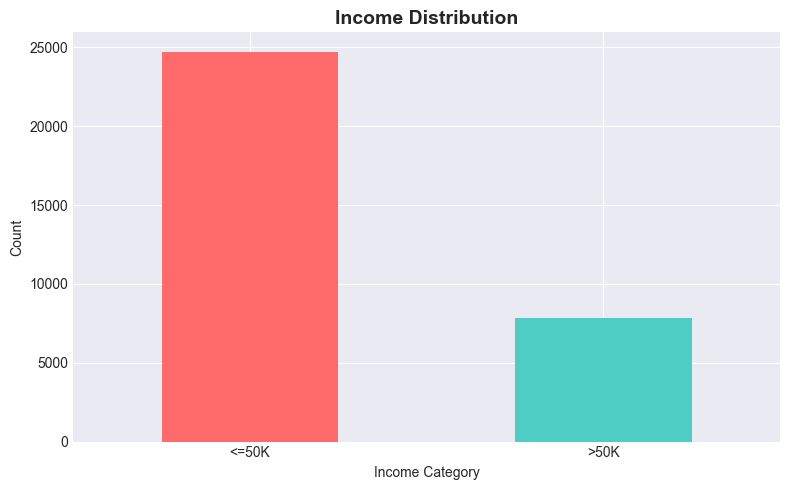

In [13]:
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Income Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Data Cleaning

In [14]:
print("="*50)
print("🧹 DATA CLEANING")
print("="*50)

# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
removed_duplicates = initial_rows - df.shape[0]
print(f"✅ Removed {removed_duplicates} duplicate rows")
print(f"📊 New shape: {df.shape}")

# %%
# Handle missing values in categorical columns
print("\n" + "-"*50)
print("Handling Missing Values")
print("-"*50)

cat_cols = ['workclass', 'occupation', 'native.country']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

print("✅ Missing values imputed using most frequent strategy")
print(f"Columns handled: {cat_cols}")
print("\nVerifying no missing values remain:")
print(df[cat_cols].isnull().sum())

🧹 DATA CLEANING
✅ Removed 24 duplicate rows
📊 New shape: (32537, 15)

--------------------------------------------------
Handling Missing Values
--------------------------------------------------
✅ Missing values imputed using most frequent strategy
Columns handled: ['workclass', 'occupation', 'native.country']

Verifying no missing values remain:
workclass         0
occupation        0
native.country    0
dtype: int64


# 4. Feature Engineering

In [15]:
print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

# Store original categorical values for reference
categorical_mappings = {}
original_df = df.copy()

# Label encode categorical variables
le = LabelEncoder()
cat_columns = df.select_dtypes(include=["object"]).columns

for col in cat_columns:
    # Store mapping
    categorical_mappings[col] = dict(zip(df[col].unique(), le.fit_transform(df[col].unique())))
    # Transform
    df[col] = le.fit_transform(df[col])
    print(f"Encoded column: {col}")

print(f"\n Total categorical columns encoded: {len(cat_columns)}")

# %%
# Save categorical mappings for later use
with open('categorical_mappings.pkl', 'wb') as f:
    pickle.dump(categorical_mappings, f)
print("\n Categorical mappings saved to 'categorical_mappings.pkl'")


FEATURE ENGINEERING
Encoded column: workclass
Encoded column: education
Encoded column: marital.status
Encoded column: occupation
Encoded column: relationship
Encoded column: race
Encoded column: sex
Encoded column: native.country
Encoded column: income

 Total categorical columns encoded: 9

 Categorical mappings saved to 'categorical_mappings.pkl'


# 5. Train-Test Split

In [16]:
print("\n" + "="*50)
print("TRAIN-TEST SPLIT")
print("="*50)

X = df.drop(['income'], axis=1)
y = df['income']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Data split completed!")
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")



TRAIN-TEST SPLIT
Features shape: (32537, 14)
Target shape: (32537,)

✅ Data split completed!
Training set: 26,029 samples (80.0%)
Testing set: 6,508 samples (20.0%)


# 6. Feature Scaling

In [17]:
print("\n" + "="*50)
print("FEATURE SCALING")
print("="*50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("StandardScaler applied")
print(f"Training data scaled: {X_train_scaled.shape}")
print(f"Testing data scaled: {X_test_scaled.shape}")

# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("\n✅ Scaler saved to 'scaler.pkl'")


FEATURE SCALING
StandardScaler applied
Training data scaled: (26029, 14)
Testing data scaled: (6508, 14)

✅ Scaler saved to 'scaler.pkl'


# 7. Handle Class Imbalance with SMOTE

In [18]:
print("\n" + "="*50)
print("HANDLING CLASS IMBALANCE")
print("="*50)

print("Before SMOTE:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c:,} samples ({c/len(y_train)*100:.2f}%)")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
unique, counts = np.unique(y_train_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c:,} samples ({c/len(y_train_resampled)*100:.2f}%)")

print("\n Classes balanced successfully!")


HANDLING CLASS IMBALANCE
Before SMOTE:
  Class 0: 19,758 samples (75.91%)
  Class 1: 6,271 samples (24.09%)

After SMOTE:
  Class 0: 19,758 samples (50.00%)
  Class 1: 19,758 samples (50.00%)

 Classes balanced successfully!


# 8. Model Training

In [19]:
print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

# Dictionary to store models and results
models = {}
results = {}

def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
    """Train a model and return evaluation metrics"""
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print(f"{'='*60}")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print results
    print(f"✅ {name} Training Complete!")
    print(f"Accuracy:  {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall:    {metrics['recall']:.4f}")
    print(f"F1-Score:  {metrics['f1_score']:.4f}")

    return model, metrics


MODEL TRAINING


# 9. Models

1. Logistic Regression

In [20]:
lr_model, lr_metrics = train_and_evaluate(
    "Logistic Regression",
    LogisticRegression(max_iter=1000, random_state=42),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['Logistic Regression'] = lr_model
results['Logistic Regression'] = lr_metrics


Training Logistic Regression...
✅ Logistic Regression Training Complete!
Accuracy:  0.7757
Precision: 0.5231
Recall:    0.7800
F1-Score:  0.6262


2. K-Nearest Neighbors

In [21]:
knn_model, knn_metrics = train_and_evaluate(
    "K-Nearest Neighbors",
    KNeighborsClassifier(n_neighbors=7),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['KNN'] = knn_model
results['KNN'] = knn_metrics


Training K-Nearest Neighbors...
✅ K-Nearest Neighbors Training Complete!
Accuracy:  0.7890
Precision: 0.5420
Recall:    0.8029
F1-Score:  0.6471


3. Naive Bayes

In [22]:
nb_model, nb_metrics = train_and_evaluate(
    "Naive Bayes",
    GaussianNB(),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['Naive Bayes'] = nb_model
results['Naive Bayes'] = nb_metrics


Training Naive Bayes...
✅ Naive Bayes Training Complete!
Accuracy:  0.8268
Precision: 0.6851
Recall:    0.5204
F1-Score:  0.5915


4. Support Vector Machine

In [23]:
svm_model, svm_metrics = train_and_evaluate(
    "Support Vector Machine",
    SVC(kernel='linear', C=1, random_state=42),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['SVM'] = svm_model
results['SVM'] = svm_metrics


Training Support Vector Machine...
✅ Support Vector Machine Training Complete!
Accuracy:  0.7657
Precision: 0.5087
Recall:    0.8010
F1-Score:  0.6222


5. Random Forest

In [24]:
rf_model, rf_metrics = train_and_evaluate(
    "Random Forest",
    RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['Random Forest'] = rf_model
results['Random Forest'] = rf_metrics


Training Random Forest...
✅ Random Forest Training Complete!
Accuracy:  0.8460
Precision: 0.6471
Recall:    0.7940
F1-Score:  0.7131


6. XGBoost

In [25]:
xgb_model, xgb_metrics = train_and_evaluate(
    "XGBoost",
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    X_train_resampled, y_train_resampled, X_test_scaled, y_test
)
models['XGBoost'] = xgb_model
results['XGBoost'] = xgb_metrics


Training XGBoost...
✅ XGBoost Training Complete!
Accuracy:  0.8695
Precision: 0.7229
Recall:    0.7436
F1-Score:  0.7331


# 10. Model Comparison

In [26]:
print("\n" + "="*80)
print("📊 MODEL COMPARISON")
print("="*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1_score'] for m in results]
})

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("="*80)



📊 MODEL COMPARISON

              Model  Accuracy  Precision   Recall  F1-Score
            XGBoost  0.869545   0.722877 0.743622  0.733103
      Random Forest  0.846036   0.647089 0.794005  0.713058
        Naive Bayes  0.826829   0.685139 0.520408  0.591519
                KNN  0.789029   0.541972 0.802934  0.647134
Logistic Regression  0.775661   0.523097 0.779974  0.626216
                SVM  0.765673   0.508708 0.801020  0.622244

🏆 BEST MODEL: XGBoost
   Accuracy: 0.8695 (86.95%)


## Visualize comparison


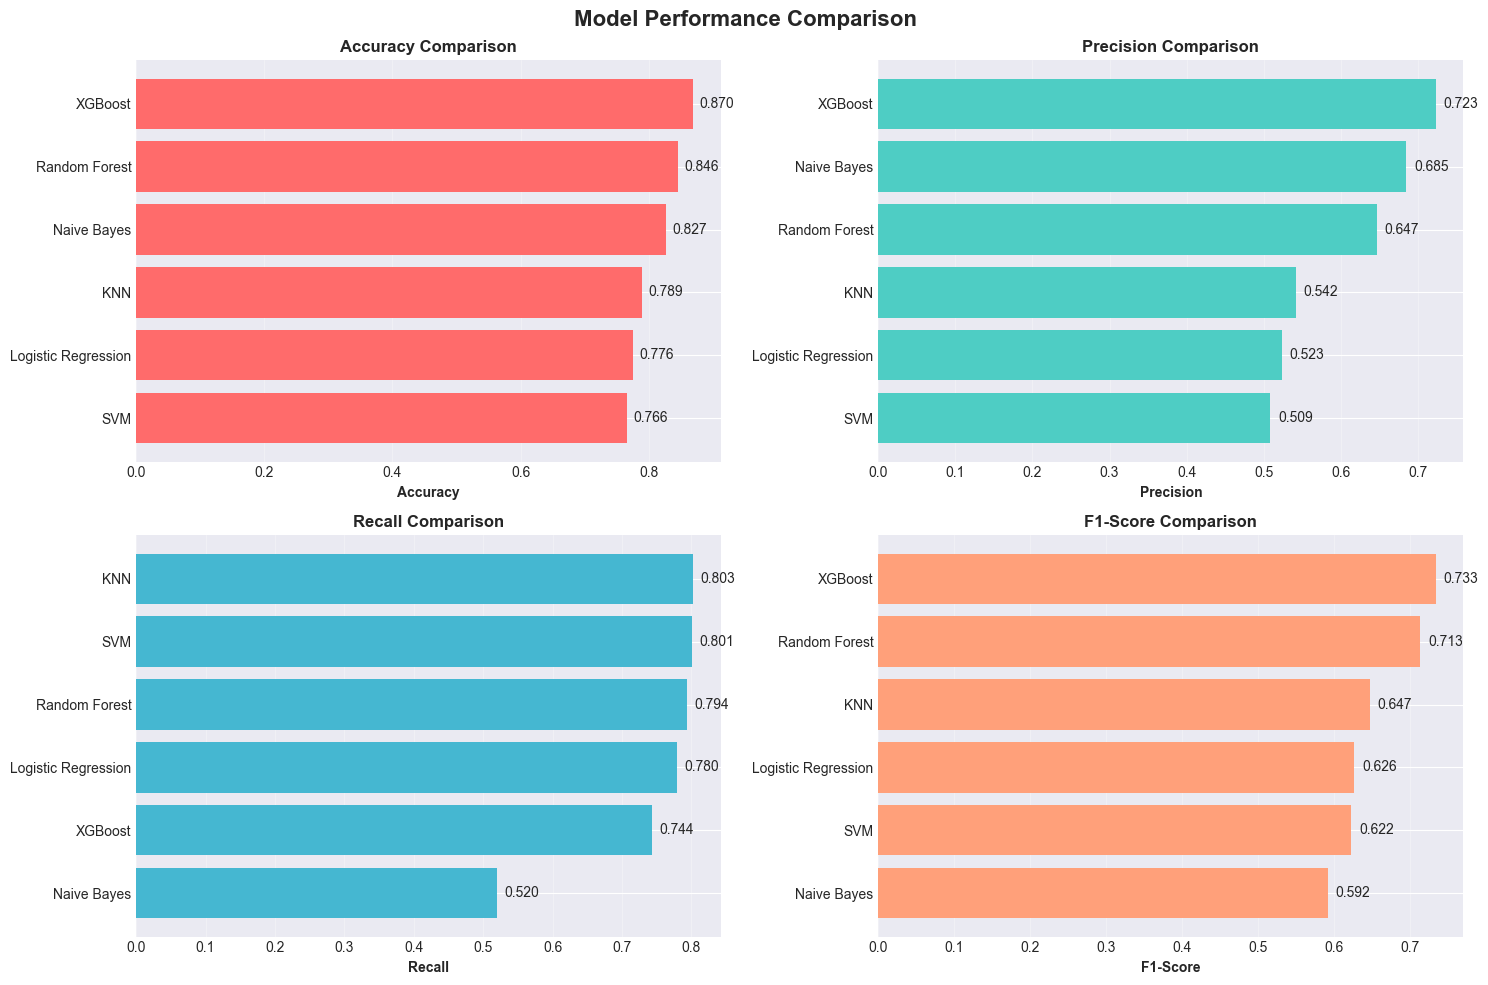

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    data = comparison_df.sort_values(metric, ascending=True)
    ax.barh(data['Model'], data[metric], color=color)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    # Add values on bars
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Confusion matrices visualization


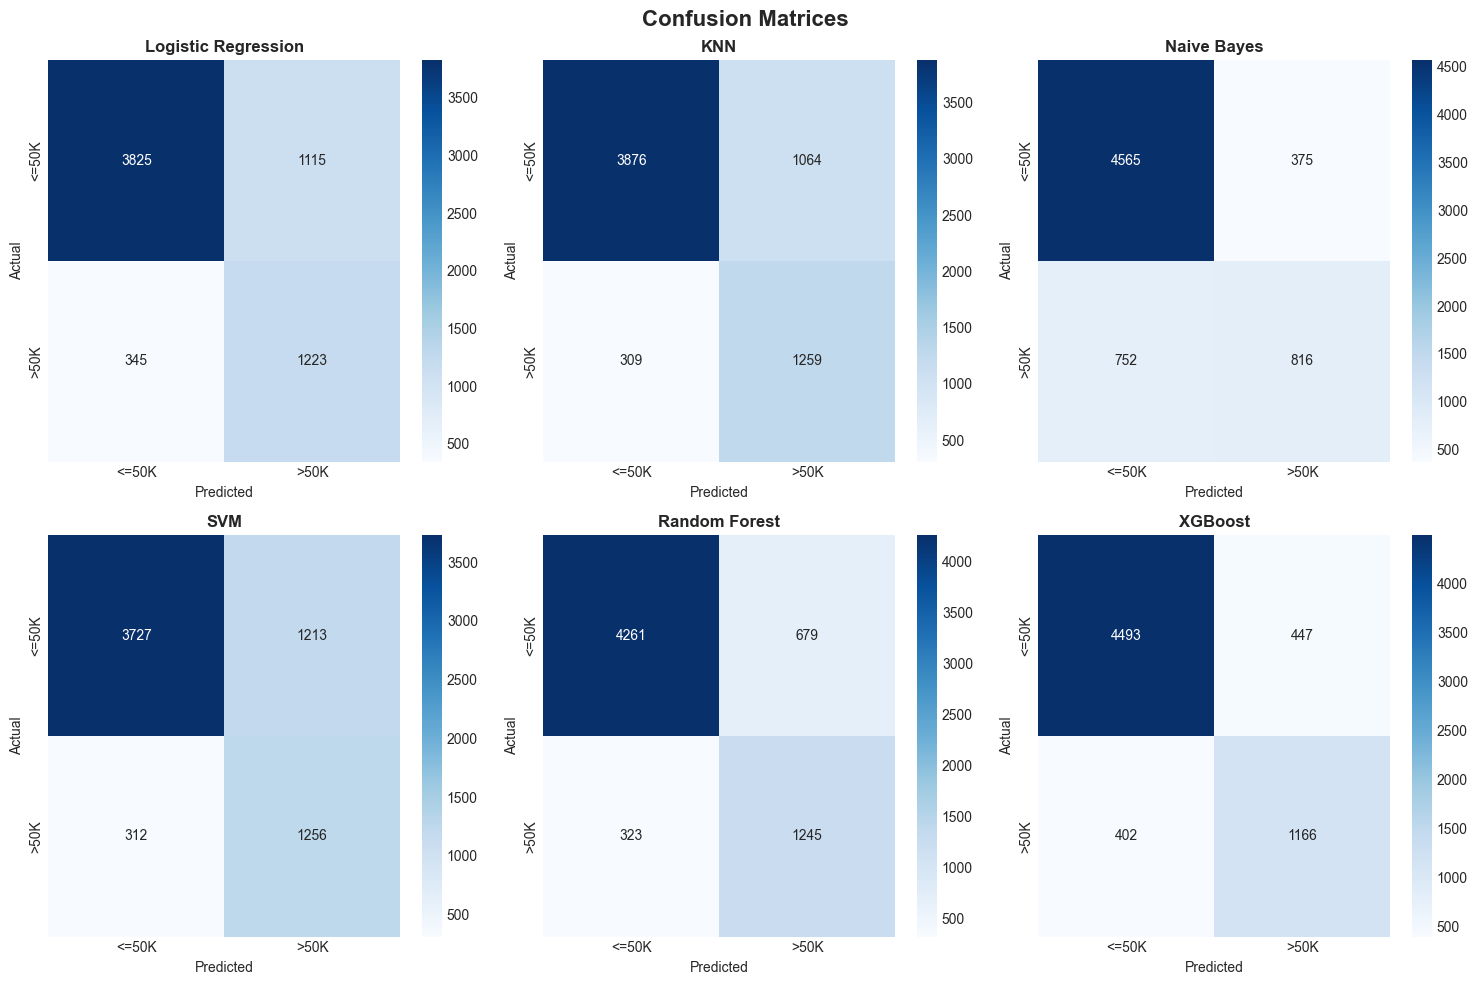

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for idx, (model_name, ax) in enumerate(zip(results.keys(), axes.flat)):
    cm = results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['<=50K', '>50K'],
                yticklabels=['<=50K', '>50K'])
    ax.set_title(model_name, fontweight='bold')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Save Models and Data

In [31]:
print("\n" + "="*80)
print("💾 SAVING MODELS AND DATA")
print("="*80)

# Create a models directory
import os

os.makedirs('saved_models', exist_ok=True)

# Save each model
print("\n📁 Saving individual models...")
for model_name, model in models.items():
    try:
        filename = f"saved_models/{model_name.replace(' ', '_').lower()}_model.pkl"
        joblib.dump(model, filename)
        print(f"   ✅ Saved: {filename}")
    except Exception as e:
        print(f"   ❌ Error saving {model_name}: {str(e)}")

# Save best model separately for easy access
try:
    best_model = models[best_model_name]
    joblib.dump(best_model, 'saved_models/best_model.pkl')
    print(f"\n🏆 Best model saved: saved_models/best_model.pkl")
except Exception as e:
    print(f"❌ Error saving best model: {str(e)}")

# Save scaler
try:
    joblib.dump(scaler, 'scaler.pkl')
    print("✅ Scaler saved: scaler.pkl")
except Exception as e:
    print(f"❌ Error saving scaler: {str(e)}")

# Save categorical mappings if they exist
try:
    categorical_mappings = {}
    for col in original_df.select_dtypes(include=['object']).columns:
        if col != 'income':
            unique_values = original_df[col].unique()
            categorical_mappings[col] = {val: idx for idx, val in enumerate(unique_values)}
    
    with open('categorical_mappings.pkl', 'wb') as f:
        pickle.dump(categorical_mappings, f)
    print("✅ Categorical mappings saved: categorical_mappings.pkl")
except Exception as e:
    print(f"❌ Error saving categorical mappings: {str(e)}")


💾 SAVING MODELS AND DATA

📁 Saving individual models...
   ✅ Saved: saved_models/logistic_regression_model.pkl
   ✅ Saved: saved_models/knn_model.pkl
   ✅ Saved: saved_models/naive_bayes_model.pkl
   ✅ Saved: saved_models/svm_model.pkl
   ✅ Saved: saved_models/random_forest_model.pkl
   ✅ Saved: saved_models/xgboost_model.pkl

🏆 Best model saved: saved_models/best_model.pkl
✅ Scaler saved: scaler.pkl
✅ Categorical mappings saved: categorical_mappings.pkl


In [32]:
# Save model results
print("\n📊 Saving model results...")
try:
    # Convert comparison_df to simple dictionary format
    metrics_list = []
    for index, row in comparison_df.iterrows():
        metrics_list.append({
            'Model': str(index),
            'Accuracy': float(row['Accuracy']),
            'Precision': float(row['Precision']),
            'Recall': float(row['Recall']),
            'F1-Score': float(row['F1-Score'])
        })
    
    results_to_save = {
        'model_metrics': metrics_list,
        'best_model': str(best_model_name),
        'best_accuracy': float(best_accuracy),
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset_shape': df.shape,
        'feature_names': list(X.columns)
    }
    
    with open('saved_models/model_results.pkl', 'wb') as f:
        pickle.dump(results_to_save, f)
    print("✅ Model results saved: saved_models/model_results.pkl")
    
except Exception as e:
    print(f"❌ Error saving model results: {str(e)}")


📊 Saving model results...
✅ Model results saved: saved_models/model_results.pkl


In [34]:
# Save processed data
print("\n💾 Saving processed data...")
try:
    # Convert to numpy arrays to avoid serialization issues
    processed_data = {
        'X_train': X_train.values if hasattr(X_train, 'values') else X_train,
        'X_test': X_test.values if hasattr(X_test, 'values') else X_test,
        'y_train': y_train.values if hasattr(y_train, 'values') else y_train,
        'y_test': y_test.values if hasattr(y_test, 'values') else y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_names': list(X.columns),
        'original_data': original_df
    }
    
    joblib.dump(processed_data, 'saved_models/processed_data.pkl')
    print("✅ Processed data saved: saved_models/processed_data.pkl")
    
except Exception as e:
    print(f"❌ Error saving processed data: {str(e)}")


💾 Saving processed data...
✅ Processed data saved: saved_models/processed_data.pkl


## Create a summary report

In [33]:
summary = f"""
{'='*80}
ADULT INCOME PREDICTION - TRAINING SUMMARY
{'='*80}

Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

Dataset Information:
  - Total Records: {df.shape[0]:,}
  - Total Features: {df.shape[1] - 1}
  - Training Samples: {X_train.shape[0]:,}
  - Testing Samples: {X_test.shape[0]:,}

Best Performing Model: {best_model_name}
  - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)

All Model Results:
{comparison_df.to_string(index=False)}

Files Saved:
  ✅ Models: saved_models/*.pkl
  ✅ Scaler: scaler.pkl
  ✅ Categorical Mappings: categorical_mappings.pkl
  ✅ Model Results: saved_models/model_results.pkl
  ✅ Processed Data: saved_models/processed_data.pkl
  ✅ Visualizations: *.png

{'='*80}
"""

print(summary)

# Save summary to file
with open('training_summary.txt', 'w') as f:
    f.write(summary)
print("\n✅ Training summary saved: training_summary.txt")

# %% [markdown]
# ## 11. Model Evaluation Details

# %%
print("\n" + "="*80)
print("📋 DETAILED CLASSIFICATION REPORTS")
print("="*80)

for model_name in results.keys():
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")

    y_pred = models[model_name].predict(X_test_scaled)
    print(classification_report(y_test, y_pred,
                                target_names=['<=50K', '>50K'],
                                digits=4))

# %%
print("\n" + "="*80)
print("✅ NOTEBOOK EXECUTION COMPLETED!")
print("="*80)
print("\nAll models trained and saved successfully.")
print("You can now run the Streamlit dashboard.")
print("\nNext steps:")
print("  1. Check 'saved_models/' directory for trained models")
print("  2. Review 'training_summary.txt' for complete results")
print("  3. Run: streamlit run dashboard.py")
print("="*80)


ADULT INCOME PREDICTION - TRAINING SUMMARY

Training Date: 2025-11-12 18:47:09

Dataset Information:
  - Total Records: 32,537
  - Total Features: 14
  - Training Samples: 26,029
  - Testing Samples: 6,508

Best Performing Model: XGBoost
  - Accuracy: 0.8695 (86.95%)

All Model Results:
              Model  Accuracy  Precision   Recall  F1-Score
            XGBoost  0.869545   0.722877 0.743622  0.733103
      Random Forest  0.846036   0.647089 0.794005  0.713058
        Naive Bayes  0.826829   0.685139 0.520408  0.591519
                KNN  0.789029   0.541972 0.802934  0.647134
Logistic Regression  0.775661   0.523097 0.779974  0.626216
                SVM  0.765673   0.508708 0.801020  0.622244

Files Saved:
  ✅ Models: saved_models/*.pkl
  ✅ Scaler: scaler.pkl
  ✅ Categorical Mappings: categorical_mappings.pkl
  ✅ Model Results: saved_models/model_results.pkl
  ✅ Processed Data: saved_models/processed_data.pkl
  ✅ Visualizations: *.png



✅ Training summary saved: training_summar